In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df=pd.read_csv('fcc-forum-pageviews.csv',dtype={'date_column_name': 'datetime64[ns]', 'value_column_name': 'int'},index_col='date')

In [23]:
# df.date=pd.to_datetime(df.date)

In [24]:
# df=df.set_index('date')

In [25]:
less_than_2point5=df[df['value']<df['value'].quantile(0.025)].index
greater_then_97point5=df[df['value']>df['value'].quantile(0.975)].index
df.drop(index=[*greater_then_97point5,*less_than_2point5],inplace=True)
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


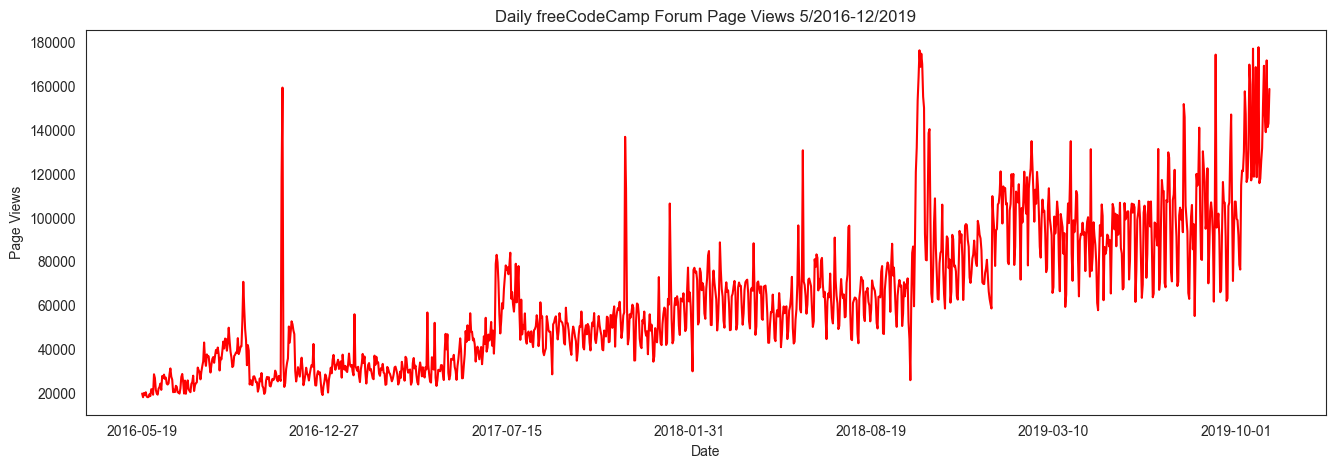

In [26]:
fig,ax=plt.subplots(figsize=(16,5))
df.plot(kind='line',color= 'red',y='value',ax=ax)
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.legend().set_visible(False)
sns.set_style('white')
plt.xticks(rotation='horizontal')
plt.show()

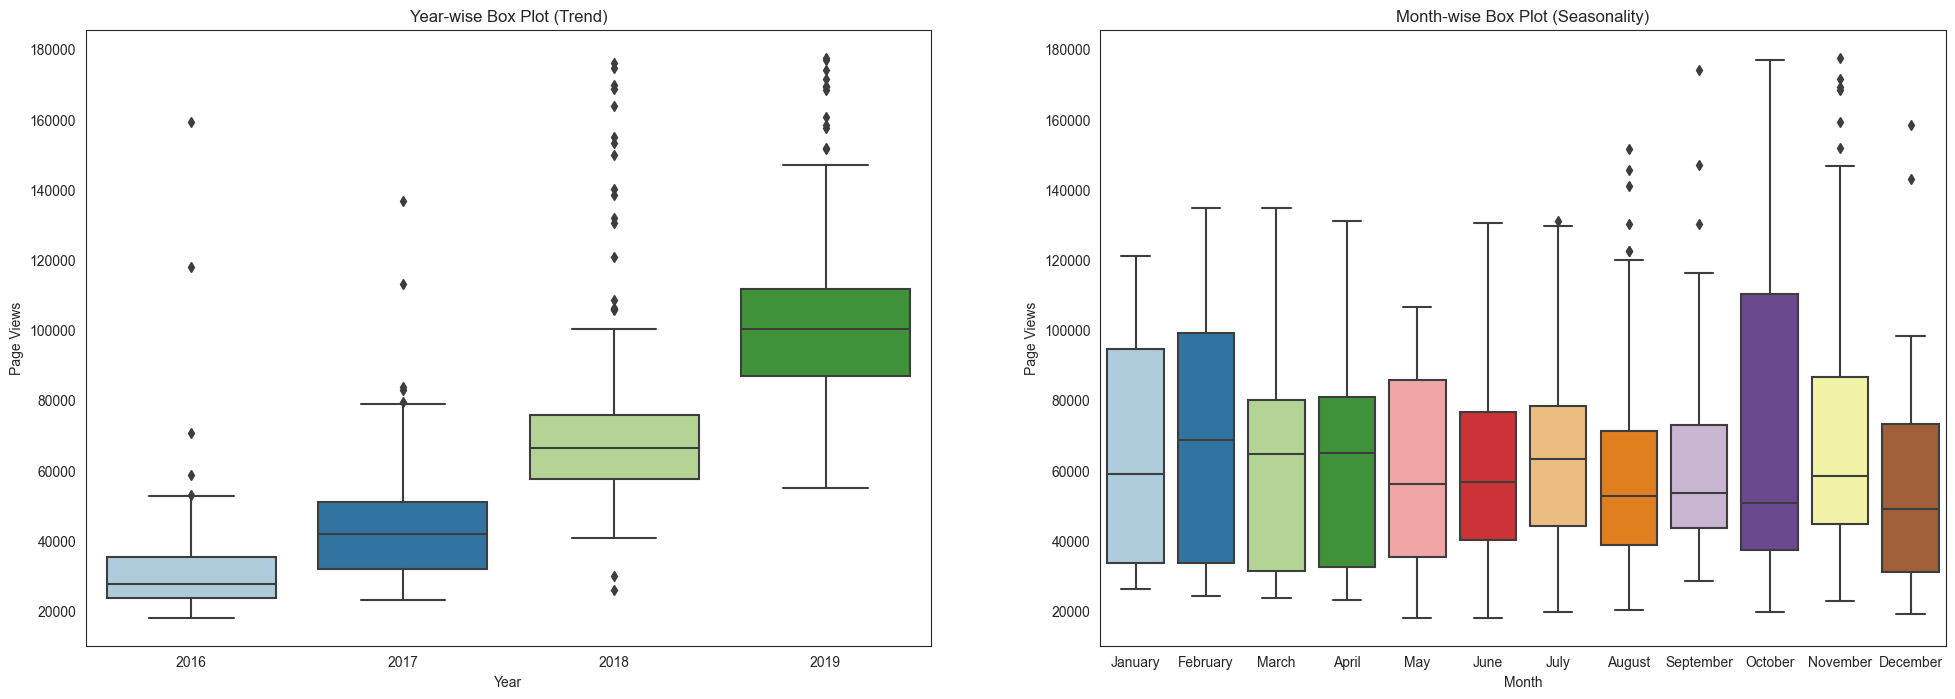

In [27]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box.date=pd.to_datetime(df_box.date)
fig,ax=plt.subplots(1,2,figsize=(24,8))
ax1,ax2=ax.flatten()
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_box['year'] = df_box['date'].dt.year
df_box['month']=df_box['date'].dt.month
sns.boxplot(x='year',y='value',data=df_box,ax=ax1)
sns.boxplot(x='month', y='value', data=df_box, ax=ax2)
ax1.set_ylabel('Page Views')
ax2.set_ylabel('Page Views')
ax1.set_xlabel('Year')
ax2.set_xlabel('Month')
ax1.set_title('Year-wise Box Plot (Trend)')
ax2.set_title('Month-wise Box Plot (Seasonality)')
ax2.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11],months,)
plt.show()

Text(0.5, 0, 'Years')

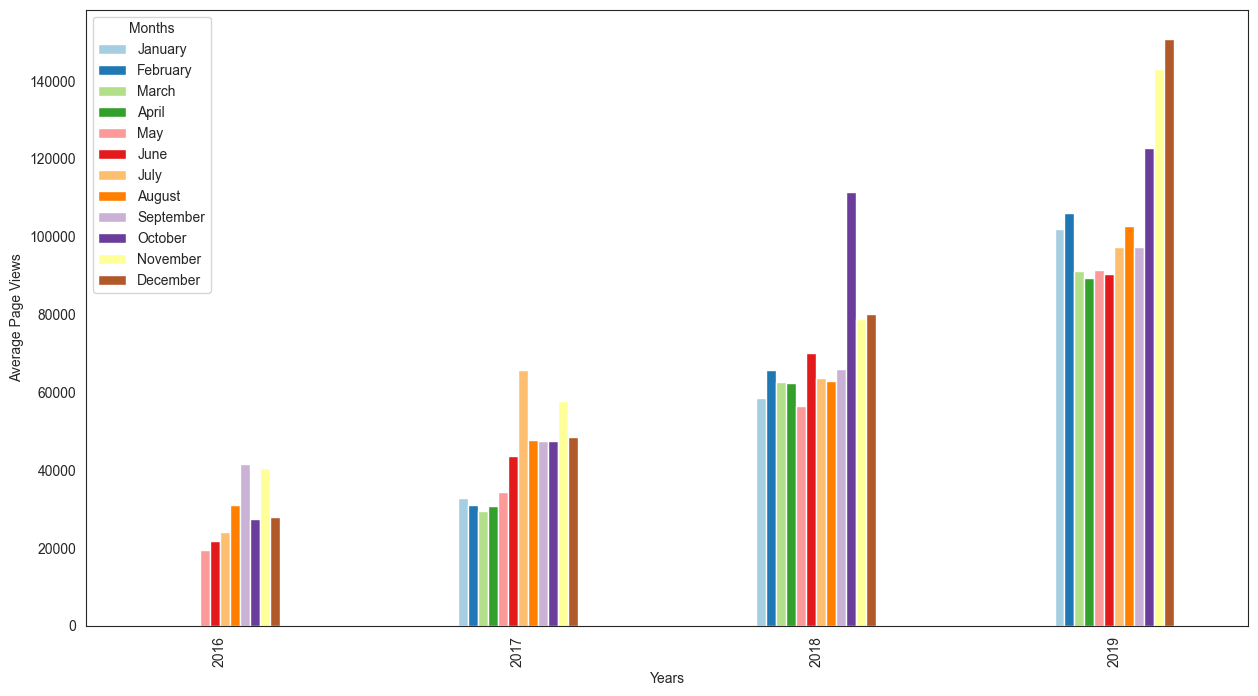

In [28]:
df_bar=df.copy()
df_bar.reset_index(inplace=True)
df_bar.date=pd.to_datetime(df_bar.date)
df_bar['month']=df_bar.date.dt.month
df_bar['year']=df_bar.date.dt.year
df_bar=df_bar.groupby(['year','month'])['value'].mean().unstack()
fig,ax=plt.subplots()
df_bar.plot(kind='bar',figsize=(15,8),width=0.4,ax=ax)
palette = sns.color_palette("Paired")
sns.set_palette(palette)
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.legend(labels=months, title='Months')
plt.ylabel('Average Page Views')
plt.xlabel('Years')
